In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math as m
import numpy as np


%matplotlib inline


star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

have_you_any = star_wars.iloc[:,1]
what_see = star_wars.iloc[:,2]

In [14]:
d = ["Yes", "No", None, "Yes"]

yes_no = {"Yes" : True, "No": False}

d = pd.Series(d).map(yes_no)


# print(what_see.values_count())

#d = pd.Series(d).map(yes_no) # cannot apply .map() as a method on a list
                             # hence, the need to convert to a Series Object


# print("Yes" in set(x))     # "Yes" in x would check in the index. Using set(x) forces
                             # Python to check in the the non redundant list of values
# have_you_any = have_you_any.map(yes_no)

# what_see = what_see.map(yes_no)

star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)

star_wars.iloc[:,1] = star_wars.iloc[:,2].map(yes_no)

# print(star_wars.iloc[:,2].value_counts())

In [15]:
movies_names = list(star_wars[star_wars.columns[3:9]].iloc[0,:])

print(movies_names)

for i,value in enumerate(movies_names):

    temp_column = star_wars.iloc[:,i+3]
    modify_dict = {}

    # Prepping my dictionary

    print ("Round %d" %i)

    modify_dict[value] = True
    modify_dict[float('nan')] = False

    # Modifying the Selected Columns

    temp_column = temp_column.map(modify_dict)

    # Checking if everything went on moothly

    # print(temp_column.value_counts())

    # Placing the new Values in the Dataframe

    star_wars.iloc[:,i+3] = temp_column


print("Prepping your Data is done.")


[u'Star Wars: Episode I  The Phantom Menace', u'Star Wars: Episode II  Attack of the Clones', u'Star Wars: Episode III  Revenge of the Sith', u'Star Wars: Episode IV  A New Hope', u'Star Wars: Episode V The Empire Strikes Back', u'Star Wars: Episode VI Return of the Jedi']
Round 0
Round 1
Round 2
Round 3
Round 4
Round 5
Prepping your Data is done.


In [16]:
# print(star_wars[star_wars.columns[8]])

print(star_wars.iloc[:,1].value_counts())

True     552
False    284
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [17]:
print(list(star_wars.columns))

[u'RespondentID', u'Have you seen any of the 6 films in the Star Wars franchise?', u'Do you consider yourself to be a fan of the Star Wars film franchise?', u'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', u'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', u'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', u'Which character shot first?', u'Are you familiar with the Expanded Universe?', u'Do you consider yourself to be a fan of the Expanded Universe?\x8c\xe6'

In [20]:
# Checking if everything is OK

# print(star_wars.iloc[:,3:9])

# You are good to go!

renaming_dict = {movie:"seen_"+str(i+1) for i,movie in enumerate(star_wars.columns[3:9])}

# print(renaming_dict)

In [21]:
# Changing the names of the Unnamed columns

star_wars = star_wars.rename(columns=renaming_dict)

# Checking if everything is fine

# print(star_wars.columns.values)

# You are good to go!

# print(star_wars.iloc[:,3].value_counts())

In [22]:
# Converting the ranking columns to float
# Skipping the first row after the heading because it contains the different answering choices


# print(star_wars.iloc[1::,9:15]) # Here: when I tried to do as suggested in the instructions
                                # I got a warning A value is trying to be set on a copy of a slice from a DataFrame.
                                # There is a risk that we would be only updating the copy created
                                # Best parctice : Using .iloc ?
 
star_wars.iloc[1::,9:15] = star_wars[star_wars.columns[9:15]].iloc[1::,:].astype(float)

print(type(star_wars[star_wars.columns[9:15]].iloc[1,1]))

<type 'float'>


In [23]:
renaming_dict = {heading:"ranking_"+str(i+1) for i,heading in enumerate(star_wars.columns[9:15])}

# print(renaming_dict)

# Renaming the columns

star_wars = star_wars.rename(columns=renaming_dict)

print(star_wars.columns)

Index([                                                                                                  u'RespondentID',
                                                         u'Have you seen any of the 6 films in the Star Wars franchise?',
                                                u'Do you consider yourself to be a fan of the Star Wars film franchise?',
                                                                                                               u'seen_1',
                                                                                                               u'seen_2',
                                                                                                               u'seen_3',
                                                                                                               u'seen_4',
                                                                                                               u'seen_5',
                        

<class 'pandas.core.series.Series'>


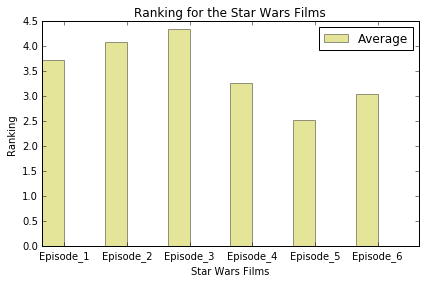

In [39]:

# Using state of the art mean

mean_ranking = star_wars[star_wars.columns[9:15]].iloc[1::,:].mean()

# print(mean_ranking)

# Question : How can I use the pivot_table to get the same result?

# Doing some zero padding to get rid of the first row containing possible answers

# star_wars.iloc[0,9:15] = 0

# print(star_wars.iloc[0,9:15])

#star_wars.drop(star_wars.head(1).index)
# Using pivot_table
      
# print(star_wars['ranking_1'].value_counts())

# converting my Ranking Series into an array
n_groups = 6
index =  np.arange(n_groups)
opacity = 0.4
bar_width = 0.35

fig, ax = plt.subplots()
ax.bar(index,mean_ranking,bar_width,alpha=opacity,color='y',label="Average")

plt.xlabel('Star Wars Films')
plt.ylabel('Ranking')
plt.title('Ranking for the Star Wars Films')
plt.xticks(index + bar_width,['Episode_'+str(i) for i in range(1,7)])
plt.tight_layout()
plt.legend()

print(type(mean_ranking))


## Summary
In this guided project, we have been going through some basic steps of data wrangling in order to extract some insights from the data. For example the average ranking for all the films (the most popular one being the Episode 5 : The Empire Strikes Back which is the second film in the original trilogy).

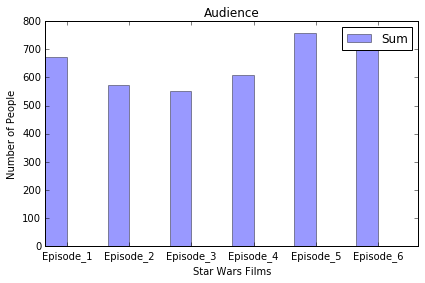

In [40]:
sum_seen = star_wars[star_wars.columns[3:9]].sum() # number of people who had seen a movie i

fig, ax = plt.subplots()
ax.bar(index,sum_seen,bar_width,alpha=opacity,color='b',label="Sum")

plt.xlabel('Star Wars Films')
plt.ylabel('Number of People')
plt.title('Audience')
plt.xticks(index + bar_width,['Episode_'+str(i) for i in range(1,7)])
plt.tight_layout()
plt.legend()

#TODO :
----------
**Explain what kind of insights you've got from the data **

*The most seen movies are also the one getting the highest ranking while the low ranked ones*

ranking_6   -3.047847
ranking_5   -2.513158
ranking_4   -3.272727
ranking_3   -4.341317
ranking_2   -4.087321
ranking_1   -3.732934
dtype: float64


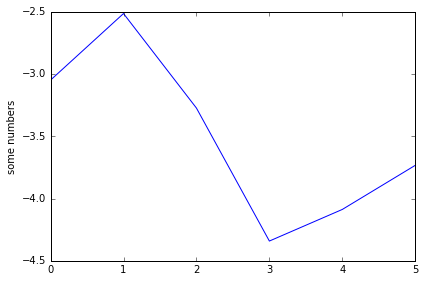

In [44]:
# permutation = np.random.permutation(len(mean_ranking))
# print(type(permutation))

dummy_ranking = mean_ranking.iloc[np.array([5,4,3,2,1,0])]

print(-dummy_ranking)

plt.plot(-dummy_ranking.values) # negative rating for better visibility and understanding
plt.ylabel('some numbers')
plt.tight_layout()

People who watched the Star Wars films: 1046


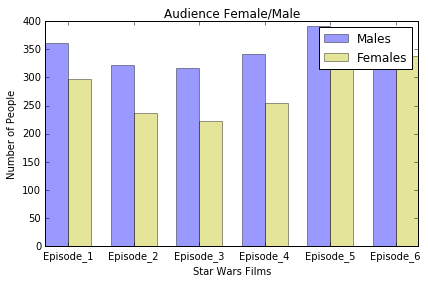

In [57]:
#Splitting Data into two groups : Male/Female

males = star_wars[star_wars["Gender"] == "Male"]

# Most seen Star Wars film among Males

sum_males = males.iloc[:,3:9].sum()

# Most seen Star Wars film among Males

females = star_wars[star_wars["Gender"] == "Female"]

unisex_audience = len(males) + len(females)

print("People who watched the Star Wars films: "+ str(unisex_audience))

sum_females = females.iloc[:,3:9].sum()

fig, ax = plt.subplots()
ax.bar(index,sum_males,bar_width,alpha=opacity,color='b',label="Males")

plt.xlabel('Star Wars Films')
plt.ylabel('Number of People')
plt.title('Audience Female/Male')
plt.xticks(index + bar_width,['Episode_'+str(i) for i in range(1,7)])
plt.tight_layout()
plt.legend()

ax.bar(index + bar_width,sum_females,bar_width,alpha=opacity,color='y',label="Females")


plt.legend()

# print(males)
# Most seen movie by group : Male/Female

# Highest ranked movie by group : Male/Female

In [61]:
# Highest ranked film by group Male/Female

hr_females = females[females.columns[9:15]].mean()

hr_males = males[males.columns[9:15]].mean()

print("Females : ", hr_females)

print("Males : ", hr_males)

print(females["Age"])

('Females : ', ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64)
('Males : ', ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64)
112      > 60
113      > 60
115     30-44
117     30-44
118     30-44
119      > 60
121     30-44
122     30-44
123     30-44
124      > 60
125     30-44
126      > 60
127      > 60
129     30-44
133     30-44
136      > 60
137     30-44
138     30-44
139      > 60
140      > 60
141      > 60
142      > 60
143     30-44
145      > 60
148     30-44
150     18-29
151      > 60
152      > 60
153     30-44
155     30-44
        ...  
1151     > 60
1152    45-60
1153    18-29
1155     > 60
1156    45-60
1157    30-44
1159    45-60
1160     > 60
1161    18-29
1163    18-29
1164     > 60
1166    30-44
1167    18-29
1168    30-44
1169    30-44
1171    45-60
1172     > 60
1173